In [1]:
# 2.1 Simple neuron example in code

import numpy as np

def neuron_output(x1, x2, w1, w2, b):
    """
    A simple neuron:
    z = w1*x1 + w2*x2 + b
    Here we will not apply an activation yet, just return z.
    """
    z = w1 * x1 + w2 * x2 + b
    return z

# Example inputs (e.g., hours studied, extra classes attended)
x1 = 5   # feature 1
x2 = 2   # feature 2

# Example weights and bias
w1 = 0.8
w2 = 1.2
b = -1.0

z = neuron_output(x1, x2, w1, w2, b)
print("Linear combination (z):", z)


Linear combination (z): 5.4


Exercise: Use activation function

• Pass the output through a step function
• Print a decision based on the output

Step function:

• if the input is less than or equal to zero, output = 0
• otherwise output = 1


In [ ]:
# Exercise: Use activation function
def step_function(z):
    if z <= 0:
        return 0
    else:
        return 1

# Apply activation function
output = step_function(z)

# Print decision based on the output
print("Activation output:", output)

if output == 1:
    print("Decision: YES")
else:
    print("Decision: NO")

Activation output: 1
Decision: YES


In [ ]:
# Modify the activation function and output messages
def activation(z):
    if z > 0:
        return 1
    return 0

y = activation(0)

def outputs(y):
    if y == 0:
        print('Noops! We not going yanywhereeeee')
    else:
        print('Yaaaaaay! Letssss GOOOOOO!!!!')

In [9]:
outputs(activation(neuron_output(x1, x2, w1, w2, b)))

Yaaaaaay! Letssss GOOOOOO!!!!


In [3]:
def activation(x):
    result = []
    for i in x:
        if i <= 0:
            result.append(0)
        else:
            result.append(1)
    return result

y = activation([3,3,4,5,5])

def image_output(y):
    for i in y:
        print(i)

image_output(y)


1
1
1
1
1


In [4]:
# Imports + load Iris dataset
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

print("X shape:", X.shape)
print("Class counts:\n", y.value_counts())

X.head()


X shape: (150, 4)
Class counts:
 target
0    50
1    50
2    50
Name: count, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (120, 4)
Test size: (30, 4)


In [6]:
# Scale features (IMPORTANT for neural networks)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: quick check mean/std after scaling
print("After scaling (train):")
print("Mean (approx):", np.round(X_train_scaled.mean(axis=0), 3))
print("Std (approx):", np.round(X_train_scaled.std(axis=0), 3))

After scaling (train):
Mean (approx): [-0. -0.  0.  0.]
Std (approx): [1. 1. 1. 1.]


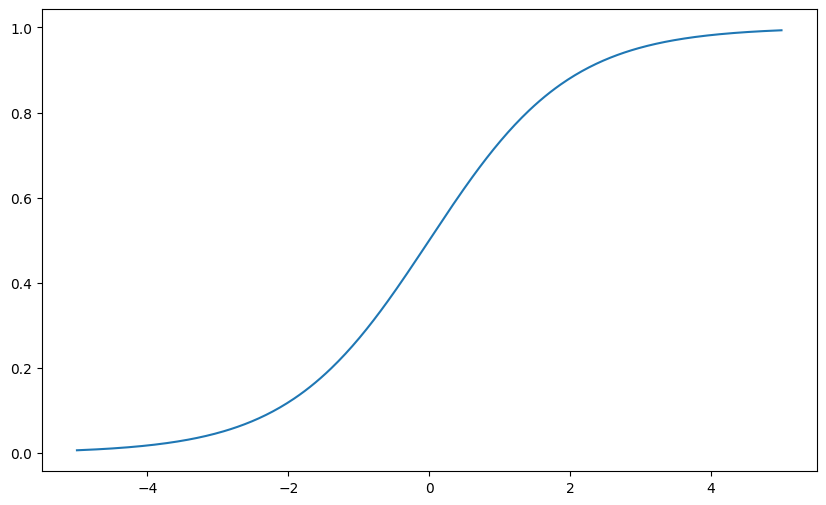

In [8]:
import matplotlib.pyplot as plt


# Generate z values
z = np.linspace(-5, 5, 400)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sig_vals = sigmoid(z)



plt.figure(figsize=(10, 6))
plt.plot(z, sig_vals, label="Sigmoid")

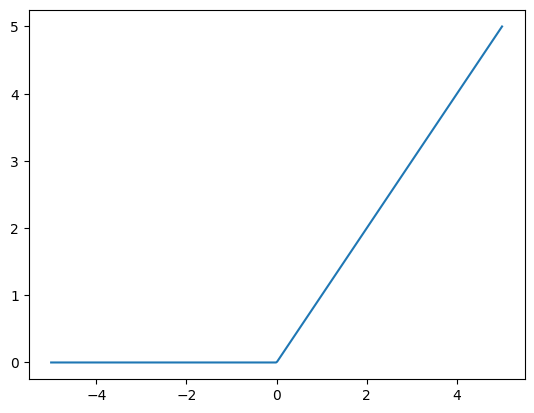

In [9]:
def relu(z):
    return np.maximum(0, z)

relu_vals = relu(z)


plt.plot(z, relu_vals, label="ReLU")

In [11]:
def tanh(z):
    return np.tanh(z)

tanh_vals = tanh(z)

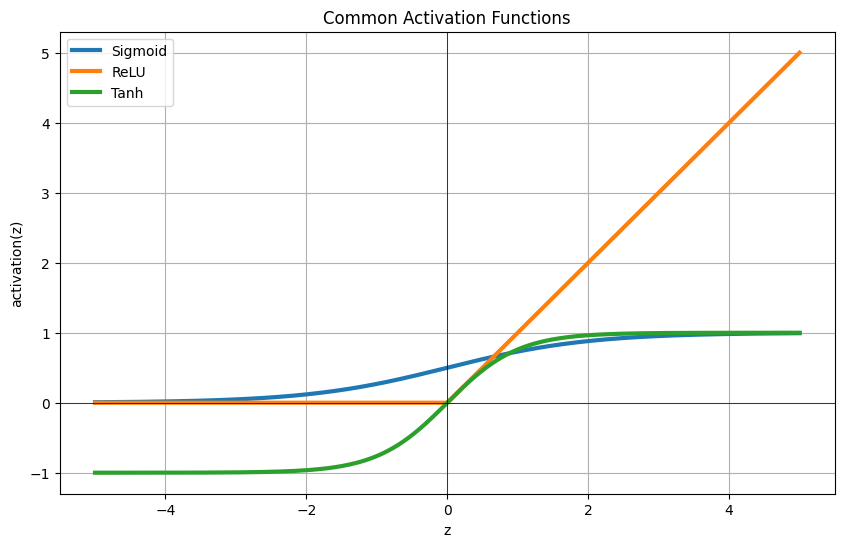

In [12]:
# all in one plot
plt.figure(figsize=(10, 6))

plt.plot(z, sig_vals, label="Sigmoid", linewidth=3)
plt.plot(z, relu_vals, label="ReLU", linewidth=3)
plt.plot(z, tanh_vals, label="Tanh", linewidth=3)

plt.title("Common Activation Functions")
plt.xlabel("z")
plt.ylabel("activation(z)")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# MLPClassifier on a real-life dataset (Breast Cancer diagnosis)

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load dataset
#    Features: measurements of cell nuclei
#    Target  : 0 = malignant, 1 = benign
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

print("Feature matrix shape:", X.shape)   # (n_samples, n_features)
print("Target shape        :", y.shape)
print("Classes             :", cancer.target_names)

# 2. Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3. Scale features (helps neural networks train better)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Define and train MLPClassifier (simple network)
mlp = MLPClassifier(
    hidden_layer_sizes=(20,),  # one hidden layer with 20 neurons
    activation="relu",         # ReLU activation in hidden layer
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

# 5. Evaluate on test set
y_pred = mlp.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n=== MLPClassifier on Breast Cancer Dataset ===")
print(f"Test Accuracy: {acc:.3f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))


Feature matrix shape: (569, 30)
Target shape        : (569,)
Classes             : ['malignant' 'benign']

=== MLPClassifier on Breast Cancer Dataset ===
Test Accuracy: 0.956

Confusion Matrix:
 [[41  1]
 [ 4 68]]

Classification Report:

              precision    recall  f1-score   support

   malignant       0.91      0.98      0.94        42
      benign       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



X shape: (569, 30)
Class counts:
 target
1    357
0    212
Name: count, dtype: int64

Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



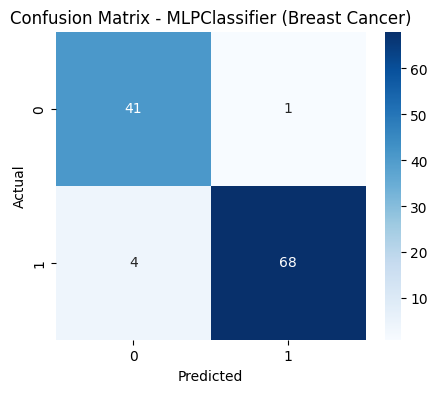

In [ ]:
# MLPClassifier on a real dataset (Breast Cancer)
# Full implementation with visualization

import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("X shape:", X.shape)
print("Class counts:\n", y.value_counts())

# 2. Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3. Scale features (IMPORTANT)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(30, 15),
    activation='relu',
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

# 5. Predictions
y_pred = mlp.predict(X_test_scaled)

# 6. Evaluation
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Confusion Matrix Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MLPClassifier (Breast Cancer)")
plt.show()
